In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [111]:
filename_py = './Model_outputs/190328_test_ab/GRB_Properties'
filename_f90 = './Model_outputs/190328_test/GRB_Properties.dat'
df_py = pd.read_msgpack(filename_py)

In [112]:
dt = np.dtype([('fill', 'i4'), 
			   ('Rank', 'i4'), 
			   (r'Lum (erg/s)',        'f8'), 
			   (r'Redshift',           'f8'), 
			   (r'Lum distance (Mpc)', 'f8'), 
			   (r'Epobs (keV)',        'f8'), 
			   (r'$\alpha$',           'f8'), 
			   (r'$\beta$',            'f8'), 
			   (r'ktild',              'f8'), 
			   ('Pflx BATSE',   'f8'), 
			   ('Pflx BAT',     'f8'), 
			   ('Pflx FREGATE', 'f8'), 
			   ('Pflx WXM',     'f8'), 
			   ('Pflx ECLAIRs', 'f8'), 
			   ('Pdet Intrinsic'  , 'f8'), 
			   ('Pdet Kommers'    , 'f8'), 
			   ('Pdet Preece'     , 'f8'), 
			   ('Pdet Stern'      , 'f8'), 
			   ('Pdet SWIFTweak'  , 'f8'), 
			   ('Pdet SWIFT'      , 'f8'), 
			   ('Pdet SWIFTbright', 'f8'), 
			   ('Pdet HETE2'      , 'f8'), 
			   ('Pdet EpGBM'      , 'f8'), 
			   ('Pdet eBAT6'      , 'f8'), 
			   ('Pdet SVOM'       , 'f8'), 
			   ('fill2','i4')])
data = np.fromfile(filename_f90, dtype=dt)
df_f90 = pd.DataFrame(data, columns=data.dtype.names)

In [122]:
df_py.columns

Index(['Nb_GRBs', 'z', 'L', 'Ep', 't90', 'Cvar', 'alpha', 'beta', 'ktild',
       'D_L', 'Epobs', 'pdet_Stern', 'pflx_BATSE', 'pdet_eBAT6', 'pflx_BAT',
       'cts_ECLAIRs', 'pdet_ECLAIRs_cts', 'pdet_ECLAIRs_flnc'],
      dtype='object')

In [114]:
df_f90[:3]

,fill,Rank,Lum (erg/s),Redshift,Lum distance (Mpc),Epobs (keV),$\alpha$,$\beta$,ktild,Pflx BATSE,...,Pdet Preece,Pdet Stern,Pdet SWIFTweak,Pdet SWIFT,Pdet SWIFTbright,Pdet HETE2,Pdet EpGBM,Pdet eBAT6,Pdet SVOM,fill2
0,188,1,1.315451e+50,1.168470,8059.850747,164.192093,0.328012,7.367347,2.611616,0.063676,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,188
1,188,2,2.244626e+50,3.497096,31102.586500,87.865201,0.941468,16.424971,1.095552,0.006738,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,188
2,188,3,5.040986e+50,7.875366,80855.406634,19.974098,1.489275,2.537410,0.331401,0.000739,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,188


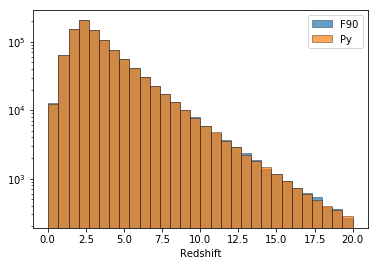

In [115]:
_, bins, _ = plt.hist(df_f90['Redshift'], bins = 30, alpha=0.7, label='F90', edgecolor='k', linewidth=0.5)
plt.hist(df_py['z'], bins = bins, alpha=0.7, label='Py', edgecolor='k', linewidth=0.5)
plt.yscale('log')
plt.legend()
plt.xlabel('Redshift')
plt.show()

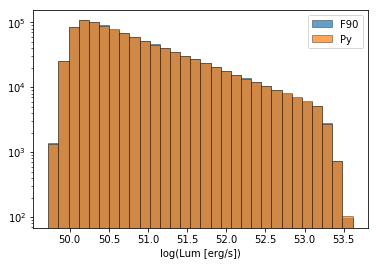

In [116]:
_, bins, _ = plt.hist(np.log10(df_f90['Lum (erg/s)']), bins = 30, alpha=0.7, label='F90', edgecolor='k', linewidth=0.5)
plt.hist(np.log10(df_py['L']), bins = bins, alpha=0.7, label='Py', edgecolor='k', linewidth=0.5)
plt.yscale('log')
plt.xlabel('log(Lum [erg/s])')
plt.legend()
plt.show()

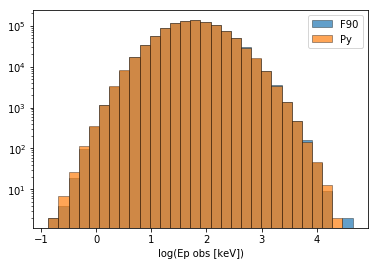

In [117]:
_, bins, _ = plt.hist(np.log10(df_f90['Epobs (keV)']), bins = 30, alpha=0.7, label='F90', edgecolor='k', linewidth=0.5)
plt.hist(np.log10(df_py['Epobs']), bins = bins, alpha=0.7, label='Py', edgecolor='k', linewidth=0.5)
plt.yscale('log')
plt.legend()
plt.xlabel('log(Ep obs [keV])')
plt.show()

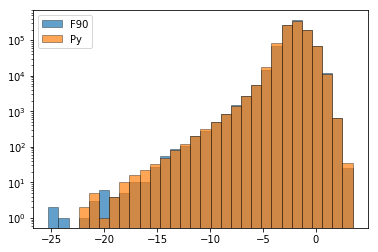

In [118]:
_, bins, _ = plt.hist(np.log10(df_f90['Pflx BATSE']), bins = 30, alpha=0.7, label='F90', edgecolor='k', linewidth=0.5)
plt.hist(np.log10(df_py['pflx_BATSE']), bins = bins, alpha=0.7, label='Py', edgecolor='k', linewidth=0.5)
plt.yscale('log')
plt.legend()
plt.show()
# df_py['beta'].replace(2.0, 2.01, inplace=True)
# df_py

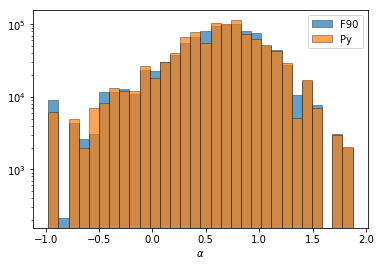

In [119]:
_, bins, _ = plt.hist(df_f90[r'$\alpha$'], bins = 30, alpha=0.7, label='F90', edgecolor='k', linewidth=0.5)
plt.hist(df_py['alpha'], bins = bins, alpha=0.7, label='Py', edgecolor='k', linewidth=0.5)
plt.yscale('log')
plt.xlabel(r'$\alpha$')
plt.legend()
plt.show()

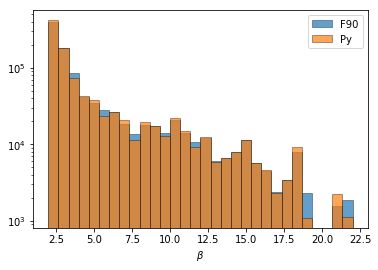

In [120]:
_, bins, _ = plt.hist(df_f90[r'$\beta$'], bins = 30, alpha=0.7, label='F90', edgecolor='k', linewidth=0.5)
plt.hist(df_py['beta'], bins = bins, alpha=0.7, label='Py', edgecolor='k', linewidth=0.5)
plt.yscale('log')
plt.xlabel(r'$\beta$')
plt.legend()
plt.show()

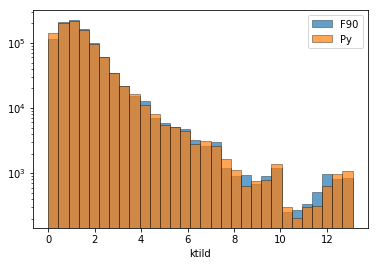

In [121]:
_, bins, _ = plt.hist(df_f90['ktild'], bins = 30, alpha=0.7, label='F90', edgecolor='k', linewidth=0.5)
plt.hist(df_py['ktild'], bins = bins, alpha=0.7, label='Py', edgecolor='k', linewidth=0.5)
plt.yscale('log')
plt.xlabel('ktild')
plt.legend()
plt.show()